In [1]:
import sys
import pathlib

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Local
cwd = pathlib.Path().resolve()
src = cwd.parent
root = src.parent
sys.path.append(str(src))
sys.path.append(str(root))

Load in all of the error data

In [3]:
# It is probably easiest to put the file containing the errors in this same directory
# each error file is an array with at least 2 inputs: 
# * 1 for the initial condition (which should always be zero)
# * 1 for the final condition (t=97)

errors = {
    # "MLP without data augmentation": ...,
    # "MLP with data augmentation": ...,
    "CNN": np.loadtxt("CNN"),
    "CNN PIL": np.loadtxt("CNN_PIL"),
    "CNN_PID": np.loadtxt("CNN_PID"),
    "CNN_PIDPID": np.loadtxt("CNN_PIDPID"),
}

In [4]:
plt.style.use('seaborn')

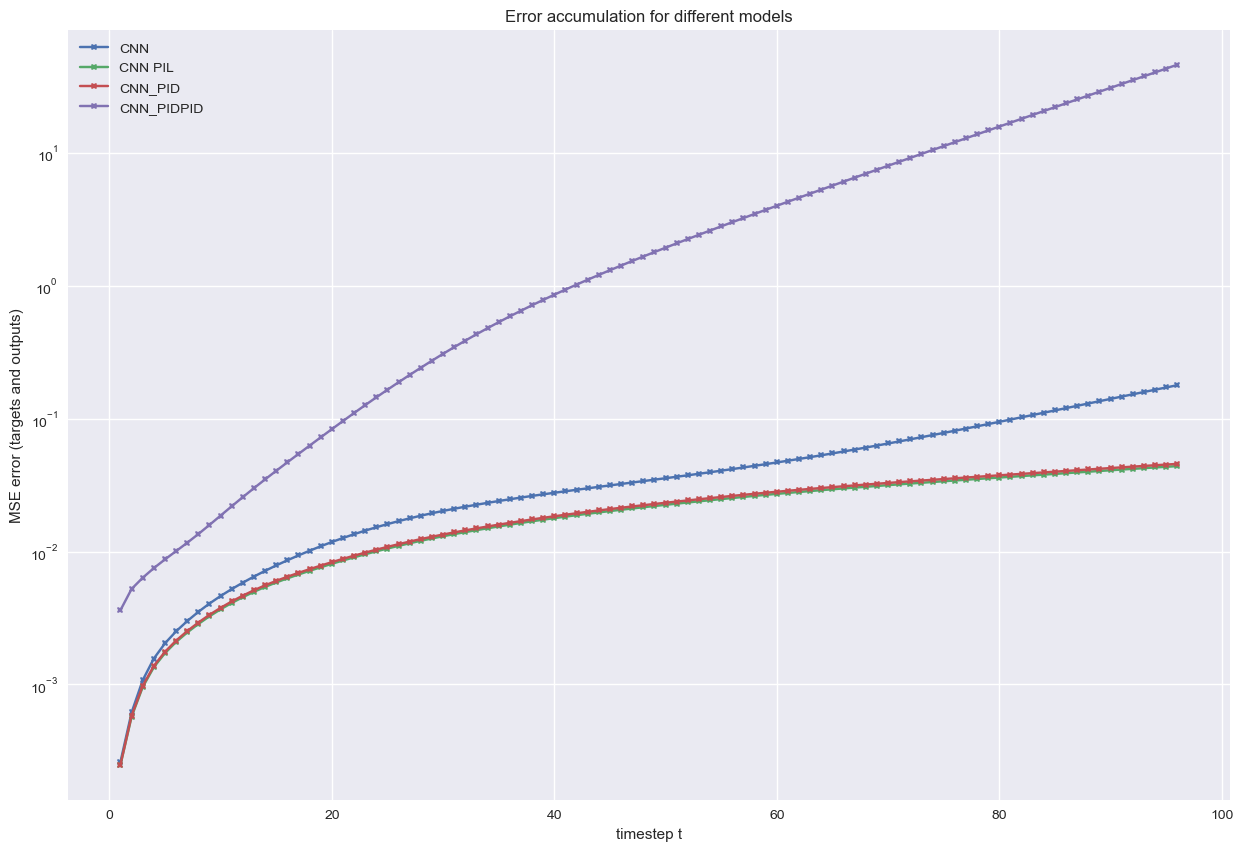

In [5]:
fig, ax = plt.subplots(figsize=(15, 10))

for key in list(errors.keys()):
    data = errors[key]

    if len(data.shape) == 2:
        t = data[0,:]
        data = data[1,:]
    
    if len(data.shape) == 1:

        # check if error is only single value (as is the case for MLPs)
        if len(data) == 1:
            data = np.array((0, data[0]))

        t = np.arange(0, len(data))

    ax.plot(t[1:], data[1:], label=key, marker='X', markersize=5)

ax.set_title("Error accumulation for different models")
ax.set_xlabel("timestep t")
ax.set_ylabel("MSE error (targets and outputs)")
ax.set_yscale('log')
ax.legend()